<div class="alert alert-block alert-info">
    <b>  Final Project </b>
</div>

# Financial Analytics
#### DAB: 401 [Group: 10]

- Richa Patel
- Surbhi Patel
- Dharmik Patel
- Raj Bhalodwala

## Technical Analysis & Monte Carlo Simulation

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import ta
%matplotlib inline
import numpy as np
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

In [2]:
# customize Matplotlib Style
plt.style.use("seaborn")
plt.rcParams["figure.figsize"]=[14,8]

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Steel Dynamics stock in 2022'}, xlabel='Date'>

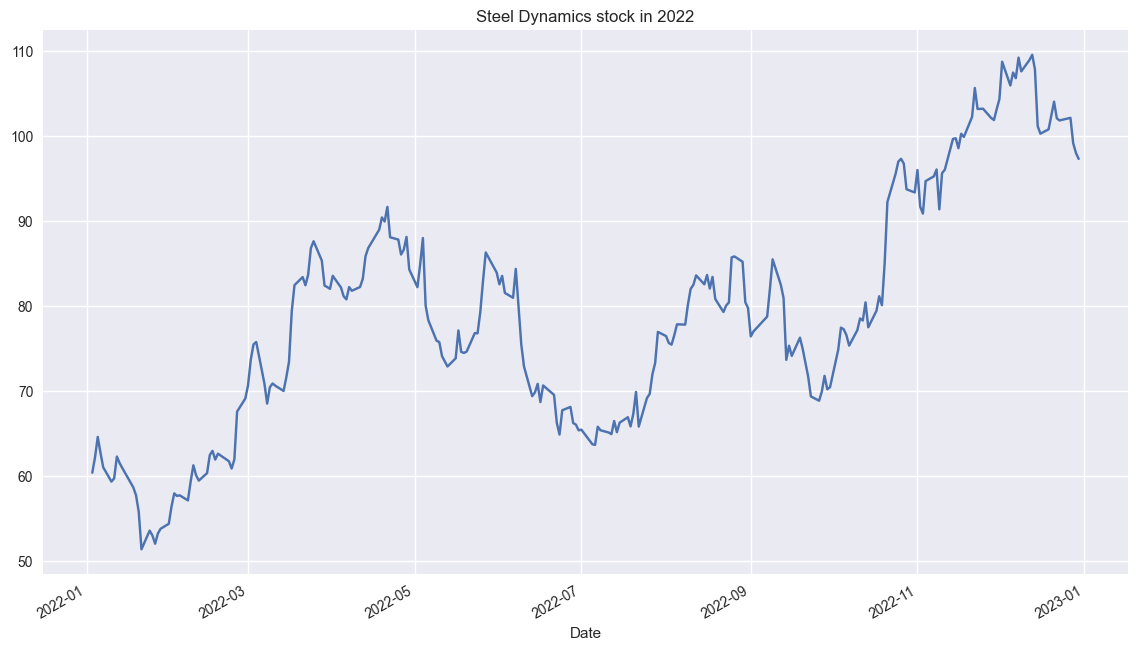

In [3]:
df = yf.download("STLD", start="2022-01-01", end="2022-12-31")
df["Adj Close"].plot(title="Steel Dynamics stock in 2022")

In [4]:
# instantiate the indicator 
ta_bbands=ta.volatility.BollingerBands(close=df["Adj Close"], window=20, window_dev=2)

In [5]:
# Copy as we will be adding to it temporarily
ta_df=df.copy()

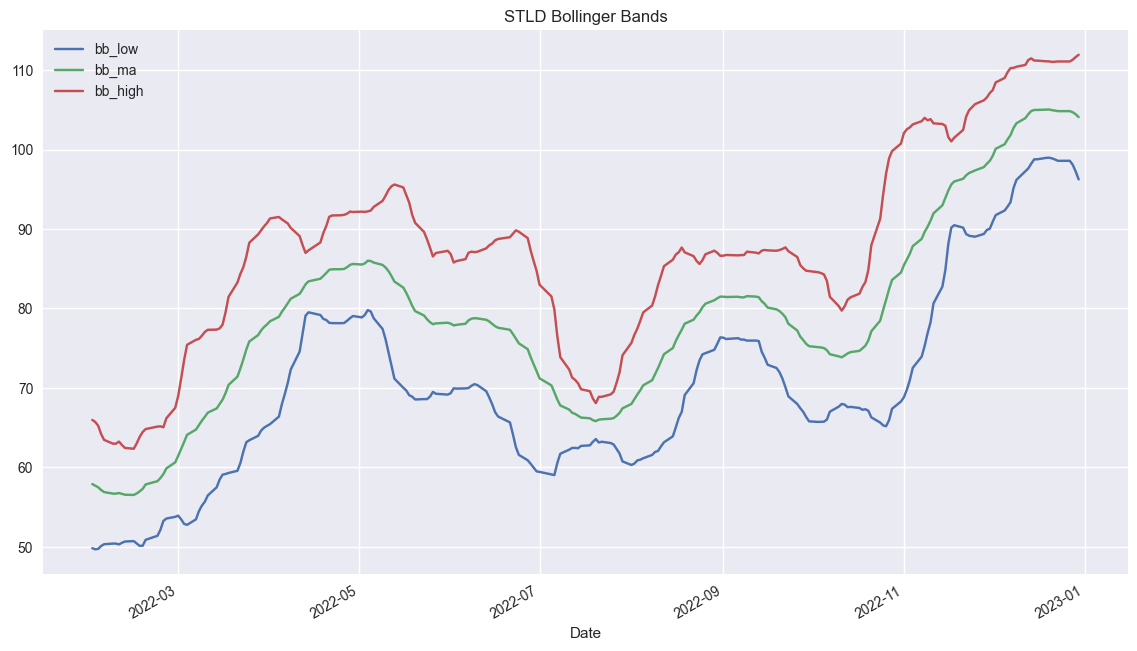

In [6]:
# Add bollinger bands
ta_df["bb_ma"]=ta_bbands.bollinger_mavg()
ta_df["bb_high"]=ta_bbands.bollinger_hband()
ta_df["bb_low"]=ta_bbands.bollinger_lband()

ta_df[["bb_low","bb_ma","bb_high"]].plot(title="STLD Bollinger Bands");

# Stock Signals

## Simple Moving Average

In [7]:
myticker="STLD"
mydata=pd.DataFrame()
mydata[myticker]=yf.download(myticker,start="2022-01-01",end="2022-12-31")['Adj Close']
mydata.columns={'Close Price'}
mydata.head(10)

[*********************100%***********************]  1 of 1 completed


,Close Price
Date,
2022-01-03,60.374744
2022-01-04,62.195980
2022-01-05,64.585121
2022-01-06,62.714931
2022-01-07,61.011200
2022-01-10,59.327049
2022-01-11,59.699127
2022-01-12,62.274307
2022-01-13,61.510563


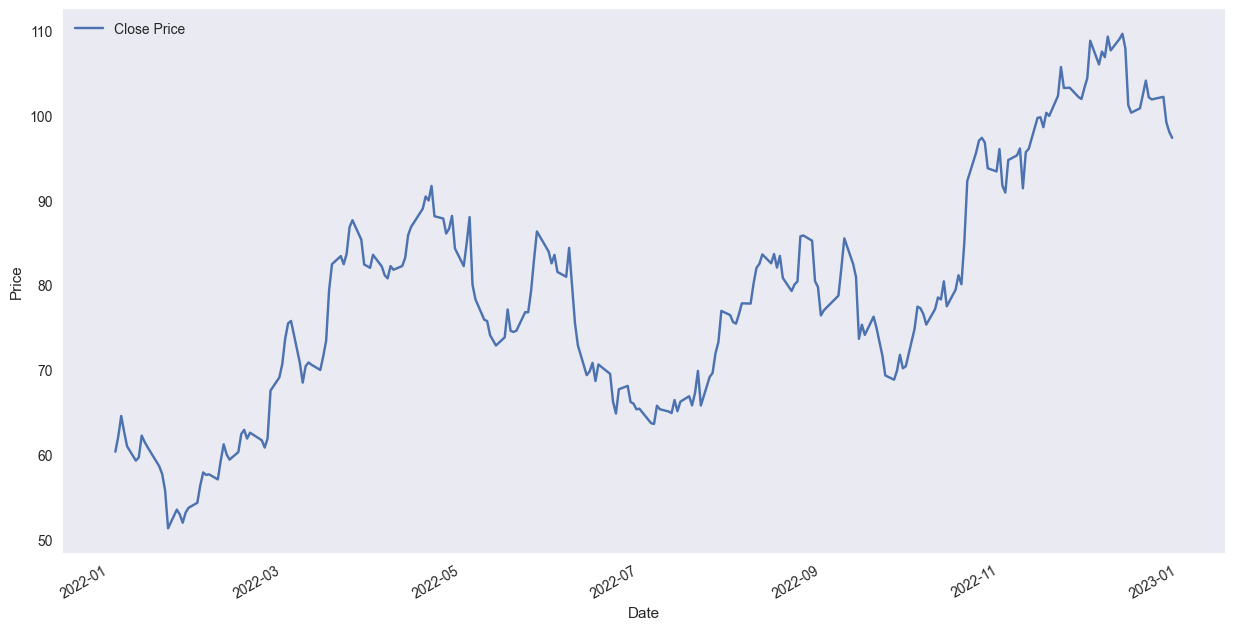

In [8]:
mydata.plot(figsize = (15,8))
plt.grid()
plt.ylabel("Price")
plt.show()

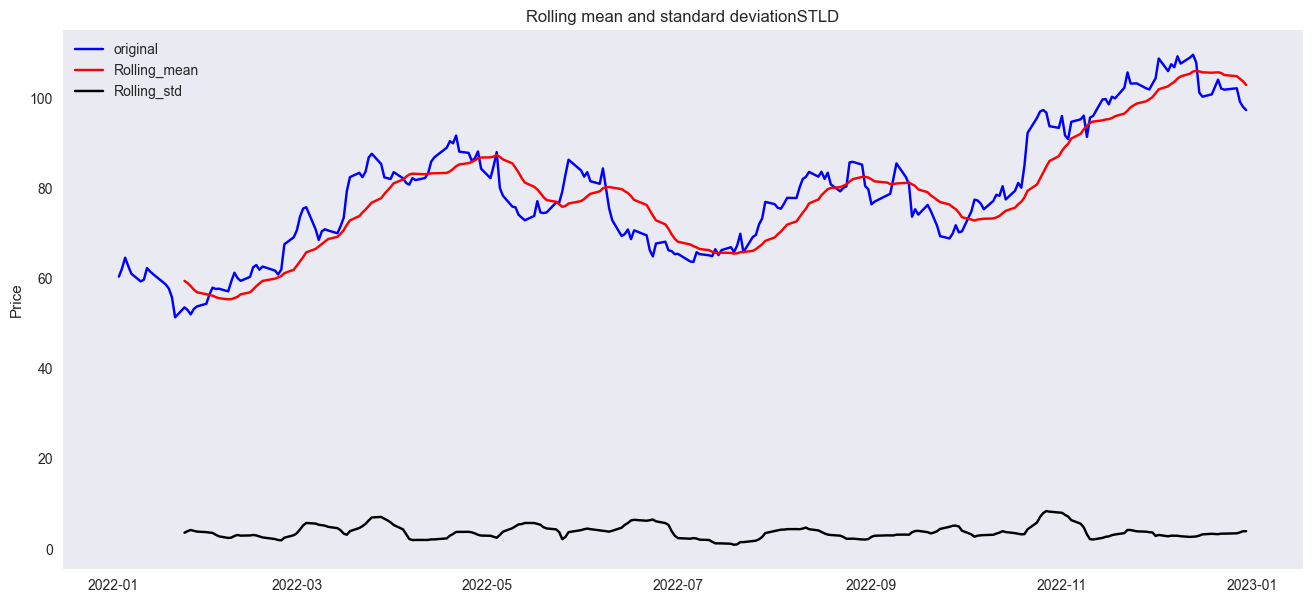

In [10]:
rolling_mean=mydata['Close Price'].rolling(15).mean()
rolling_std=mydata['Close Price'].rolling(15).std()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

orig=plt.plot(mydata['Close Price'],color='blue',label='original')
mean=plt.plot(rolling_mean,color='red',label='Rolling_mean')
std=plt.plot(rolling_std,color='black',label='Rolling_std')
plt.legend (loc='best')
plt.title('Rolling mean and standard deviation' + myticker)
plt.grid()
plt.ylabel ("Price")
plt.show()

In [11]:
#create 30 days simple moving average column
mydata['SMA30'] = mydata['Close Price'].rolling(window= 30 , min_periods = 1).mean()

#create 60 days simple moving average column
mydata['SMA90'] = mydata['Close Price'].rolling(window= 90 , min_periods = 1).mean()

#display first few rows
mydata.head()

,Close Price,SMA30,SMA90
Date,,,
2022-01-03,60.374744,60.374744,60.374744
2022-01-04,62.195976,61.285360,61.285360
2022-01-05,64.585121,62.385281,62.385281
2022-01-06,62.714931,62.467693,62.467693
2022-01-07,61.011200,62.176395,62.176395


In [12]:
mydata['Signal'] = 0.0
mydata['Signal'] = np.where(mydata['SMA30']>mydata['SMA90'],1.0,0.0)

mydata['Position'] = mydata['Signal'].diff()
       
#display first few rows
mydata.head()

,Close Price,SMA30,SMA90,Signal,Position
Date,,,,,
2022-01-03,60.374744,60.374744,60.374744,0.0,NaN
2022-01-04,62.195976,61.285360,61.285360,0.0,0.0
2022-01-05,64.585121,62.385281,62.385281,0.0,0.0
2022-01-06,62.714931,62.467693,62.467693,0.0,0.0
2022-01-07,61.011200,62.176395,62.176395,0.0,0.0


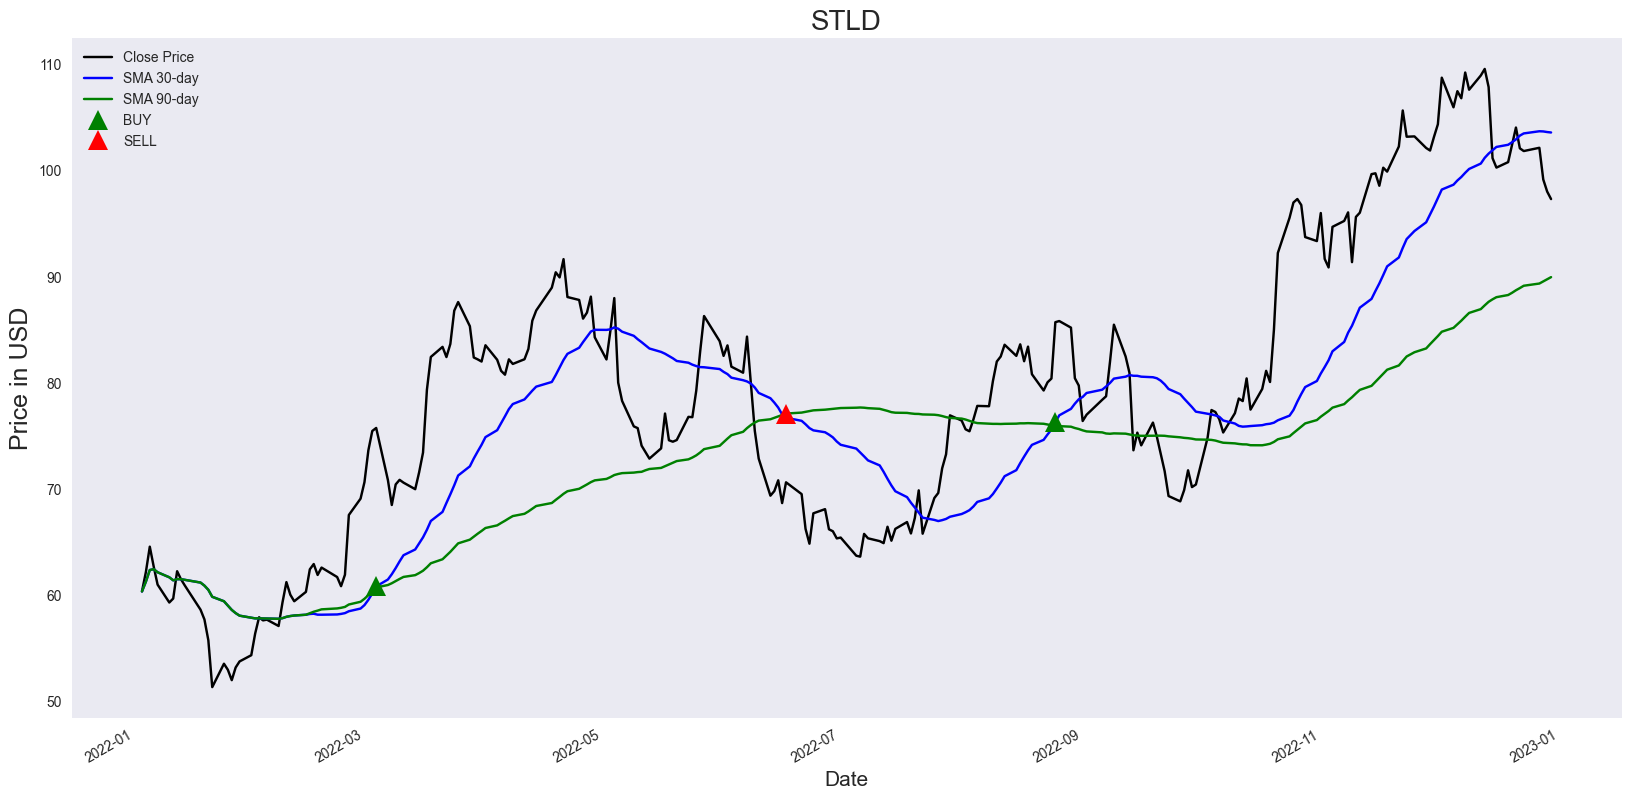

In [14]:
plt.figure(figsize = (20,10))

mydata['Close Price'].plot(color = 'k',label = 'Close Price')
mydata['SMA30'].plot(color = 'b', label = 'SMA 30-day')
mydata['SMA90'].plot(color = 'g', label = 'SMA 90-day')

plt.plot(mydata[mydata['Position'] == 1].index, mydata['SMA30'][mydata['Position']==1],'^',markersize = 15, color = 'g', label = 'BUY')

plt.plot(mydata[mydata['Position'] == -1].index, mydata['SMA90'][mydata['Position']== -1],'^',markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD',fontsize=18)
plt.xlabel('Date',fontsize=15)
plt.title(myticker,fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [15]:
df_position=mydata[(mydata['Position']==1)|(mydata['Position']==-1)]
df_position['Position']=df_position['Position'].apply(lambda x: 'Buy' if x==1 else 'Sell')
print(tabulate(df_position,headers='keys',tablefmt='psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   SMA30 |   SMA90 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2022-03-04 00:00:00 |       75.7671 | 60.8408 | 60.7439 |        1 | Buy        |
| 2022-06-17 00:00:00 |       70.6475 | 76.7308 | 77.122  |        0 | Sell       |
| 2022-08-25 00:00:00 |       85.7289 | 76.3032 | 75.9892 |        1 | Buy        |
+---------------------+---------------+---------+---------+----------+------------+


## Exponential Moving Average

In [16]:
myticker1="STLD"
df=pd.DataFrame()
df[myticker1]=yf.download(myticker1,start="2022-01-01",end="2022-12-31")['Adj Close']
df.columns={'Close Price'}
df.head(10)

[*********************100%***********************]  1 of 1 completed


,Close Price
Date,
2022-01-03,60.374744
2022-01-04,62.195972
2022-01-05,64.585121
2022-01-06,62.714931
2022-01-07,61.011200
2022-01-10,59.327045
2022-01-11,59.699127
2022-01-12,62.274307
2022-01-13,61.510567


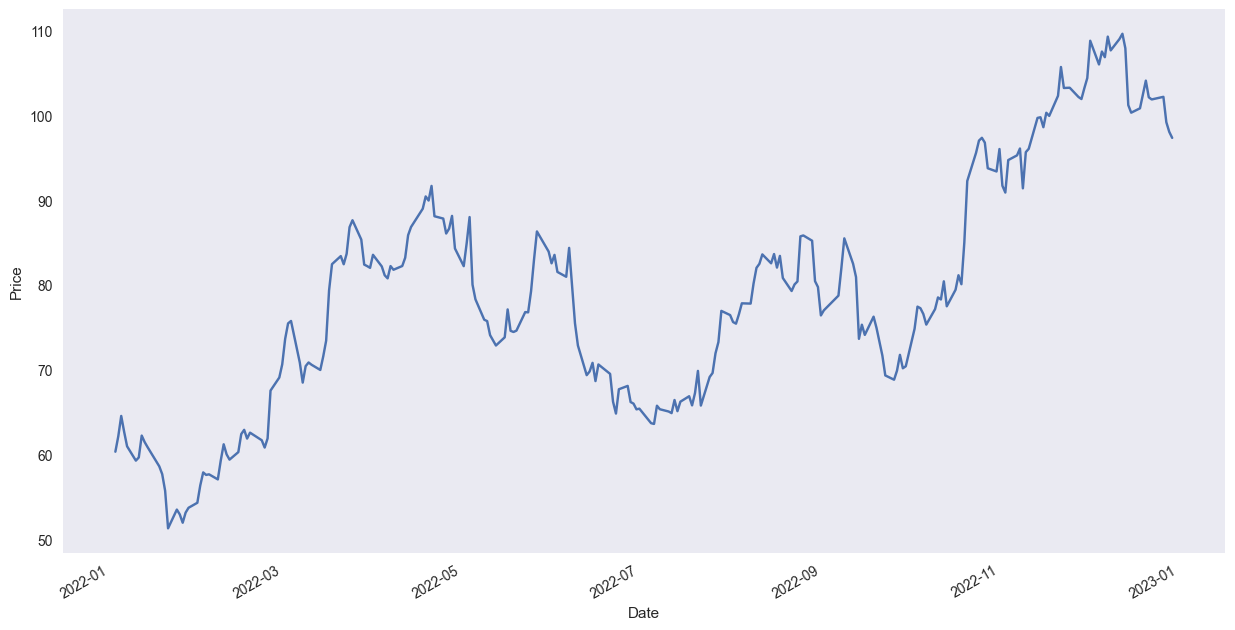

In [17]:
df['Close Price'].plot(figsize = (15,8))
plt.grid()
plt.ylabel("Price")
plt.show()

In [19]:
#create 30 days exponential moving average column
df['EMA30'] = df['Close Price'].ewm(span= 30 , adjust = False).mean()

#create 90 days exponential moving average column
df['EMA90'] = df['Close Price'].ewm(span= 90 , adjust = False).mean()

df['Signal'] = 0.0
df['Signal'] = np.where(df['EMA30']>df['EMA90'],1.0,0.0)

df['Position'] = df['Signal'].diff()

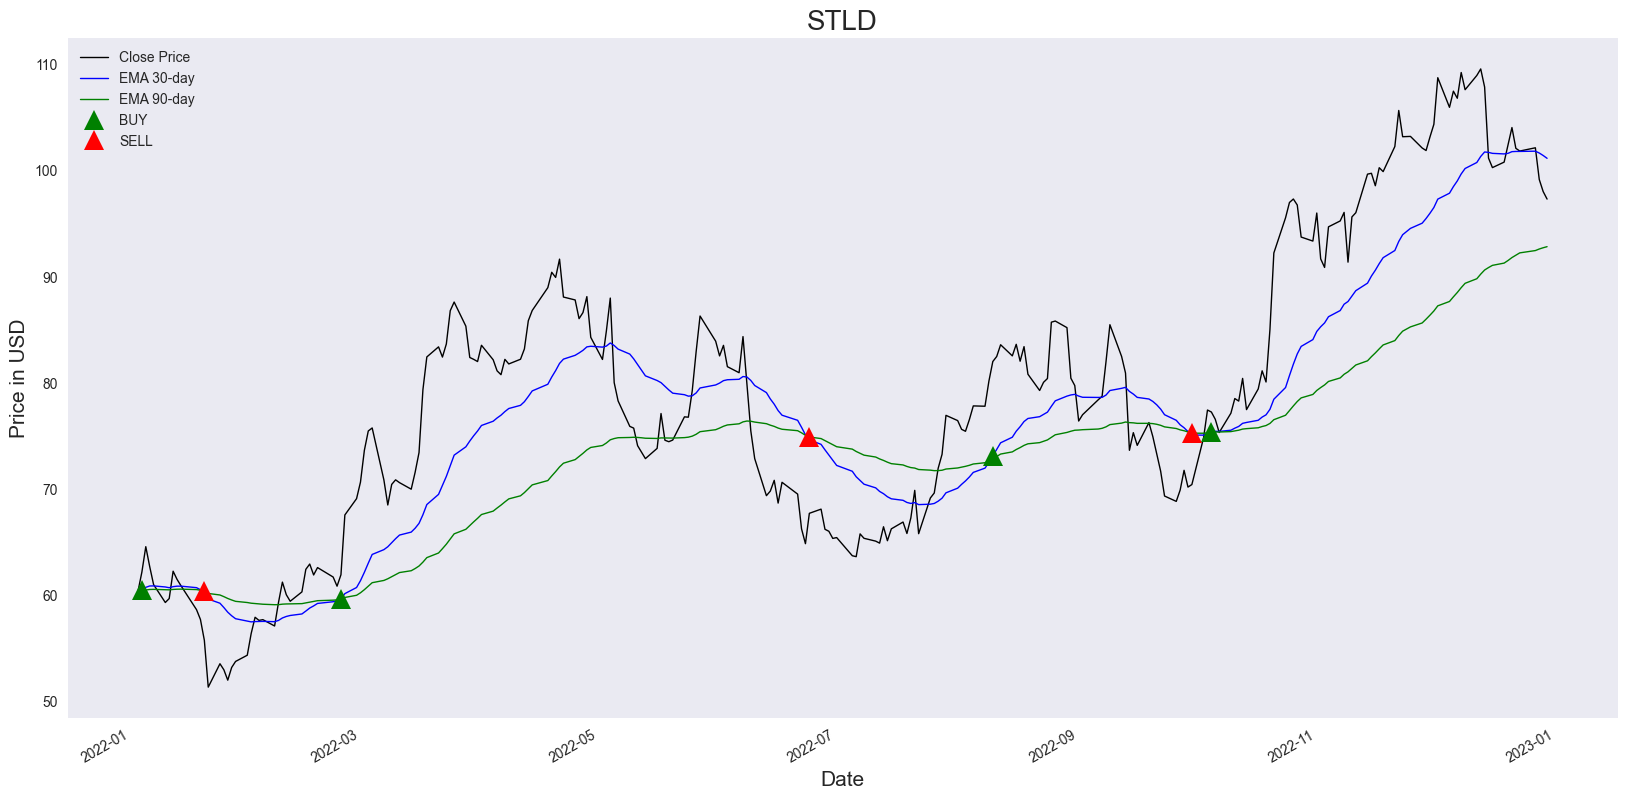

In [20]:
plt.figure(figsize = (20,10))

df['Close Price'].plot(color = 'k',lw=1,label = 'Close Price')
df['EMA30'].plot(color = 'b',lw=1, label = 'EMA 30-day')
df['EMA90'].plot(color = 'g', lw=1, label = 'EMA 90-day')

plt.plot(df[df['Position'] == 1].index, df['EMA30'][df['Position']==1],'^',markersize = 15, color = 'g', label = 'BUY')

plt.plot(df[df['Position'] == -1].index, df['EMA90'][df['Position']== -1],'^',markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.title(myticker1,fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [21]:
df_position=df[(df['Position']==1)|(df['Position']==-1)]
df_position['Position']=df_position['Position'].apply(lambda x: 'Buy' if x==1 else 'Sell')
print(tabulate(df_position,headers='keys',tablefmt='psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   EMA30 |   EMA90 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2022-01-04 00:00:00 |       62.196  | 60.4922 | 60.4148 |        1 | Buy        |
| 2022-01-20 00:00:00 |       55.7727 | 60.2245 | 60.3784 |        0 | Sell       |
| 2022-02-24 00:00:00 |       61.9414 | 59.652  | 59.6282 |        1 | Buy        |
| 2022-06-24 00:00:00 |       67.7277 | 74.6443 | 74.9157 |        0 | Sell       |
| 2022-08-10 00:00:00 |       82.0234 | 73.1256 | 72.8666 |        1 | Buy        |
| 2022-09-30 00:00:00 |       70.4364 | 75.1052 | 75.2783 |        0 | Sell       |
| 2022-10-05 00:00:00 |       77.2667 | 75.3717 | 75.3596 |        1 | Buy        |
+---------------------+---------------+---------+---------+----------+------------+


# Forecasting

In [22]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import yfinance as yf
import matplotlib.pyplot as plt
import prophet
plt.style.use('fivethirtyeight')

In [23]:
myticker="STLD"
mydata=pd.DataFrame()
mydata[myticker]=yf.download(myticker,start="2022-01-01",end="2022-12-31")['Adj Close']
mydata.columns={'Close Price'}
mydata.head(10)

[*********************100%***********************]  1 of 1 completed


,Close Price
Date,
2022-01-03,60.374744
2022-01-04,62.195976
2022-01-05,64.585114
2022-01-06,62.714931
2022-01-07,61.011200
2022-01-10,59.327045
2022-01-11,59.699127
2022-01-12,62.274307
2022-01-13,61.510571


In [24]:
mydata=mydata.reset_index()
mydata[['ds','y']]=mydata[['Date','Close Price']]

In [25]:
model=prophet.Prophet()

In [26]:
prophet_mydata=mydata.drop(['Date','Close Price'], axis=1)

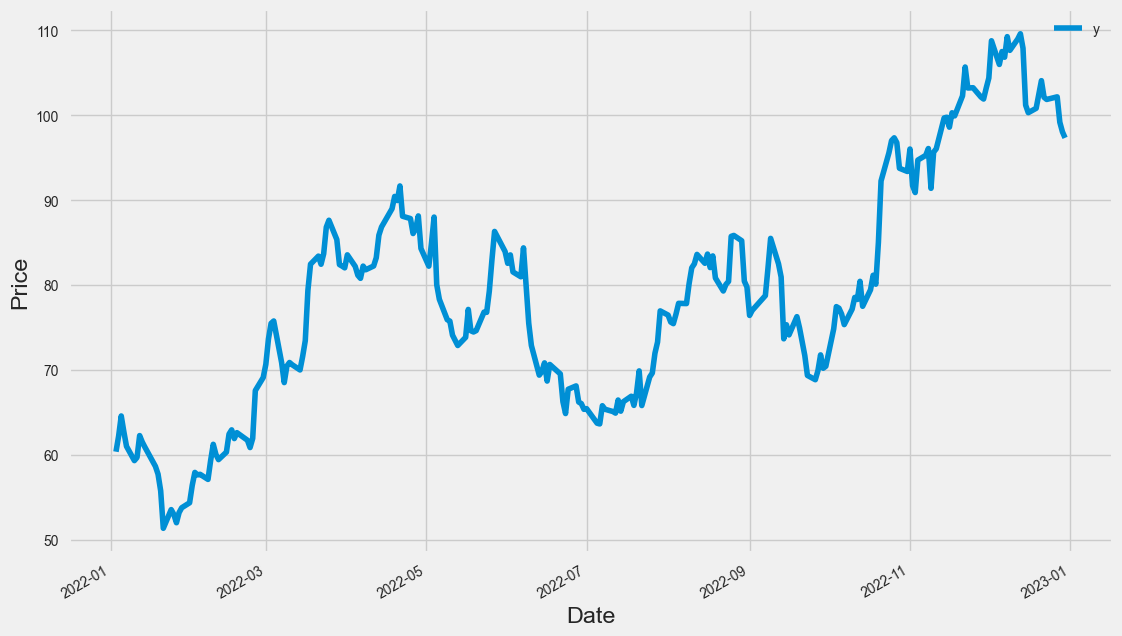

In [27]:
ax=prophet_mydata.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [28]:
model.fit(prophet_mydata)

13:28:49 - cmdstanpy - INFO - Chain [1] start processing
13:28:49 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future=model.make_future_dataframe(periods=365)

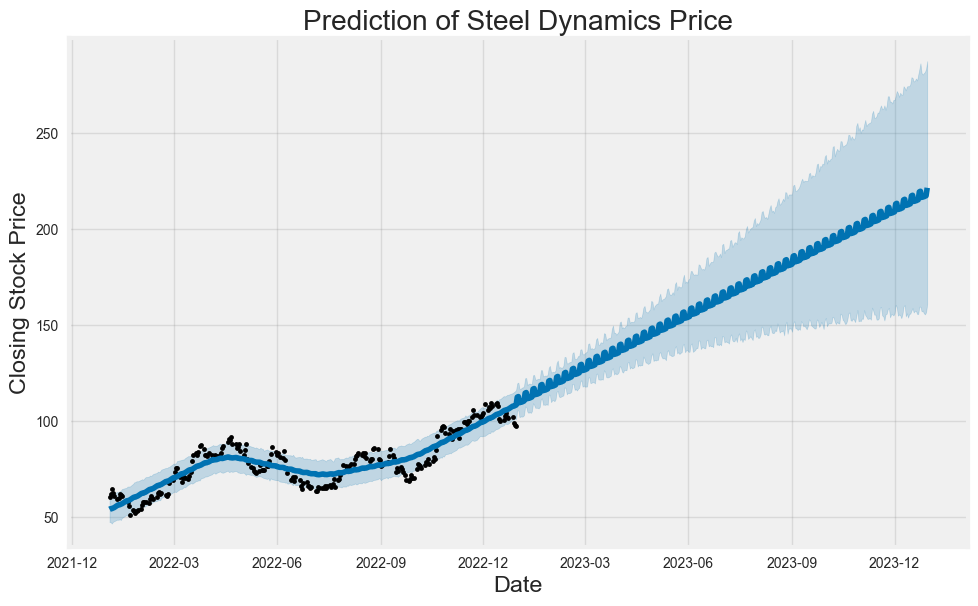

,ds,yhat,yhat_lower,yhat_upper
611,2023-12-26,216.799603,157.542279,280.462732
612,2023-12-27,216.785528,156.181241,281.231240
613,2023-12-28,217.121422,155.571438,281.807877
614,2023-12-29,217.343553,156.669324,283.442805
615,2023-12-30,221.490892,161.001841,287.458114


In [30]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of Steel Dynamics Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")

plt.show()

predictions[['ds', 'yhat','yhat_lower','yhat_upper']].tail()

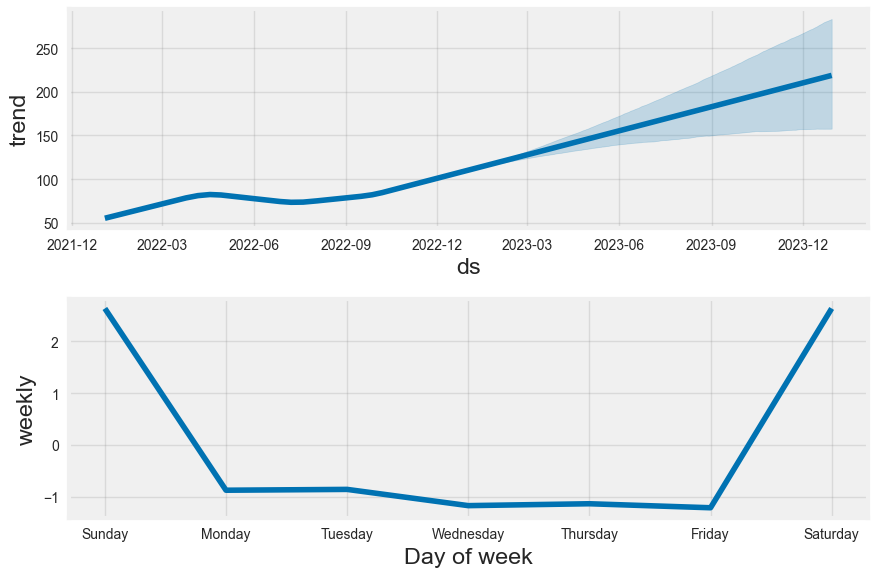

In [31]:
model.plot_components(predictions)
plt.show()